# B. Exploratory Analysis on Big Data

In [1]:
# import the required libraries
from matplotlib import pyplot as plt
import pandas as pd
from scipy.stats import linregress
import numpy as np
import datetime
%matplotlib inline

# The file is uploaded in the jupyter notebook

#population_report is the data frame to store the .CSV files content
insurance_report = pd.read_csv('InsuranceRates.csv')

insurance_report= insurance_report.fillna(-1)

In [2]:
# Reading the dataframe
insurance_report.head()

,BusinessYear,StateCode,IssuerId,PlanId,Age,IndividualRate,IndividualTobaccoRate
0,2014,AK,21989,21989AK0010001,0-20,29.00,-1.0
1,2014,AK,21989,21989AK0020001,Family Option,36.95,-1.0
2,2014,AK,21989,21989AK0020001,Family Option,36.95,-1.0
3,2014,AK,21989,21989AK0010001,21,32.00,-1.0
4,2014,AK,21989,21989AK0010001,22,32.00,-1.0


# B1. Summarising the Data

In [3]:
#Shape of the dataframe
insurance_report.shape

(12694445, 7)

In [4]:
#Unique values of years in the data
insurance_report.BusinessYear.unique()

array([2014, 2015, 2016], dtype=int64)

In [5]:
# Unique ages present in the data
insurance_report.Age.unique()

array(['0-20', 'Family Option', '21', '22', '23', '24', '25', '26', '27',
       '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38',
       '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65 and over'], dtype=object)

In [6]:
# number of unique states present in the data
len(insurance_report.StateCode.unique())

39

In [7]:
# number of unique issuer id present in the data
len(insurance_report.IssuerId.unique())

910

In [8]:
# Max of the individual Rate
insurance_report.IndividualRate.max()

999999.0

In [9]:
# Min of the individual Rate
insurance_report.IndividualRate.min()

0.0

In [10]:
# Mean of the individual Rate
insurance_report.IndividualRate.mean()

4098.026458581588

In [11]:
# Calculate on average a tobacco smoker pays more than non smoker
Difference_rate = insurance_report.IndividualTobaccoRate[insurance_report.IndividualTobaccoRate >= 0] - insurance_report.IndividualRate[insurance_report.IndividualTobaccoRate >= 0]
Difference_rate.mean()

88.90566067009055

# B2. Investigating Individual Insurance Costs

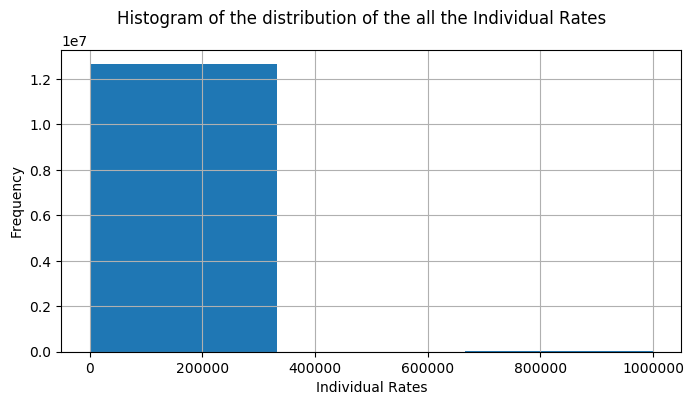

In [12]:
# To find the distribution of insurance rate 
fig = plt.figure(figsize=(8,4), dpi=100)
fig.suptitle('Histogram of the distribution of the all the Individual Rates')

insurance_report.IndividualRate.hist(bins =3)

plt.ylabel('Frequency');
plt.xlabel('Individual Rates');

In [13]:
# Clean the distribution as the Insurane Rates can neither be free nor too high
mod_report = insurance_report[(insurance_report.IndividualRate > 0) & (insurance_report.IndividualRate < 2000) ]

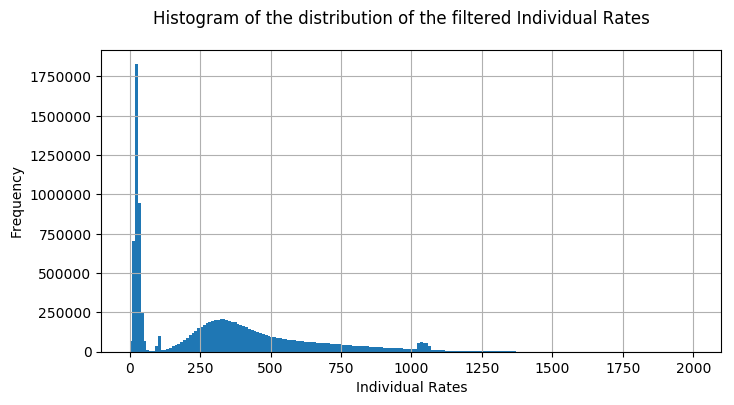

In [14]:
# To find the distribution of insurance rate 
fig = plt.figure(figsize=(8,4), dpi=100)
fig.suptitle('Histogram of the distribution of the filtered Individual Rates')

mod_report.IndividualRate.hist(bins = 200)

plt.ylabel('Frequency');
plt.xlabel('Individual Rates');

In [15]:
# Check the filtered Data
mod_report.head()

,BusinessYear,StateCode,IssuerId,PlanId,Age,IndividualRate,IndividualTobaccoRate
0,2014,AK,21989,21989AK0010001,0-20,29.00,-1.0
1,2014,AK,21989,21989AK0020001,Family Option,36.95,-1.0
2,2014,AK,21989,21989AK0020001,Family Option,36.95,-1.0
3,2014,AK,21989,21989AK0010001,21,32.00,-1.0
4,2014,AK,21989,21989AK0010001,22,32.00,-1.0


# B3. Variation in Costs across States

In [16]:
#Pivot the states to get the individual insurance rate of each state
box_report = mod_report.pivot(index=None, columns='StateCode', values='IndividualRate')
box_report.head()

StateCode,AK,AL,AR,AZ,DE,FL,GA,HI,IA,ID,...,PA,SC,SD,TN,TX,UT,VA,WI,WV,WY
0,29.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,36.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,36.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


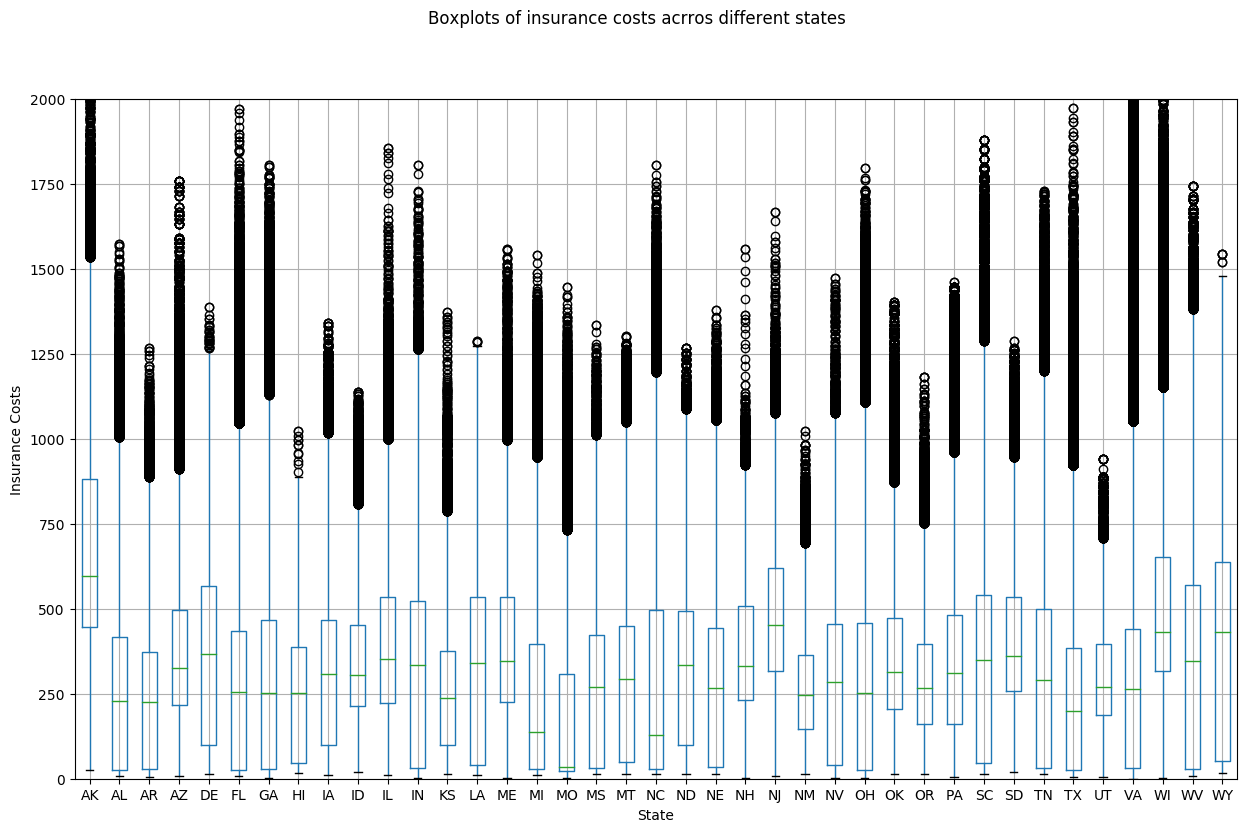

In [17]:
#Plot the relation of insurance costs across various states
fig = plt.figure(figsize=(15, 9), dpi=100)
fig.suptitle('Boxplots of insurance costs acrros different states')
box_report.boxplot(column =['AK', 'AL', 'AR', 'AZ', 'DE', 'FL', 'GA', 
                            'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'LA', 
                            'ME', 'MI', 'MO', 'MS', 'MT', 'NC', 'ND',
                            'NE', 'NH', 'NJ', 'NM', 'NV', 'OH', 'OK', 
                            'OR', 'PA', 'SC', 'SD', 'TN', 'TX', 'UT',
                            'VA', 'WI', 'WV', 'WY'], showfliers = True, return_type='axes')

plt.ylim(0, 2000)
plt.xlabel('State');
plt.ylabel('Insurance Costs');

In [18]:
# Get the total number of unique issuers for each state
MergedBarReport = mod_report.groupby(['StateCode' ])['IssuerId'].nunique().reset_index()
MergedBarReport = MergedBarReport.sort_values('IssuerId', ascending = False).reset_index(drop=1)

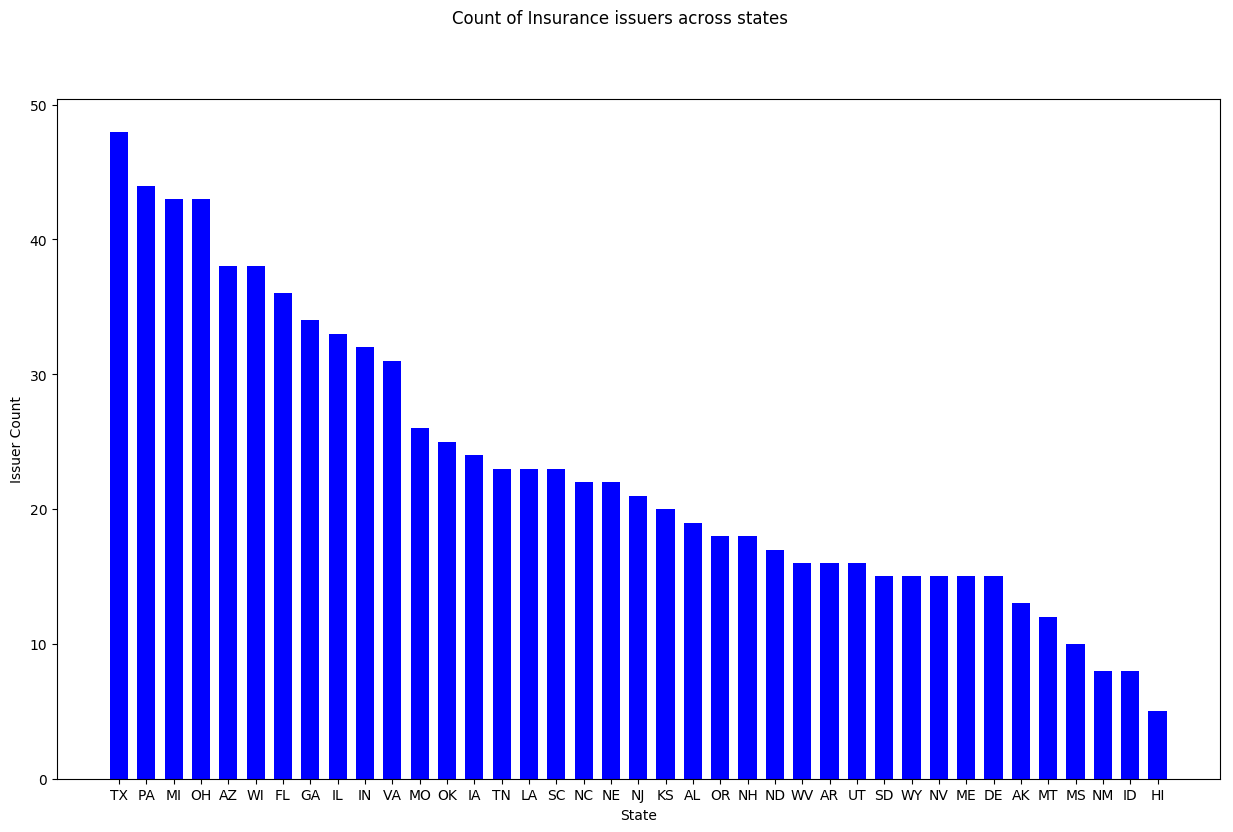

In [21]:
# plot the number of issuerance issuers for each state
fig= plt.figure(figsize=(15, 9), dpi=100)
fig.suptitle('Count of Insurance issuers across states')
width = 1/1.5
plt.bar(MergedBarReport.StateCode.index, MergedBarReport.IssuerId, width, color="blue",align='center')
Level = MergedBarReport['StateCode'].unique()
plt.xticks(MergedBarReport.StateCode.index, Level)
plt.xlabel('State');
plt.ylabel('Issuer Count');
plt.show()

In [22]:
# get the unique number of issuers in each state
scatplot_report_one = mod_report.groupby(['StateCode' ])['IssuerId'].nunique().reset_index()
scatplot_report_one.rename(columns={'IssuerId': 'CountIssuerId'}, inplace=True)

# get the median insurance state for each state
scatplot_report_two = mod_report.groupby('StateCode').median().reset_index()
scatplot_report_two.rename(columns={'IndividualRate': 'MedianIndividualRate'}, inplace=True)

#join the above two data frames
Intermediate_scatmerge = pd.merge(scatplot_report_one, scatplot_report_two,  how='inner', 
                       left_on=['StateCode'], right_on = ['StateCode'])

# sort the data frame by StateCode
Intermediate_scatmerge = Intermediate_scatmerge.sort_values('StateCode')

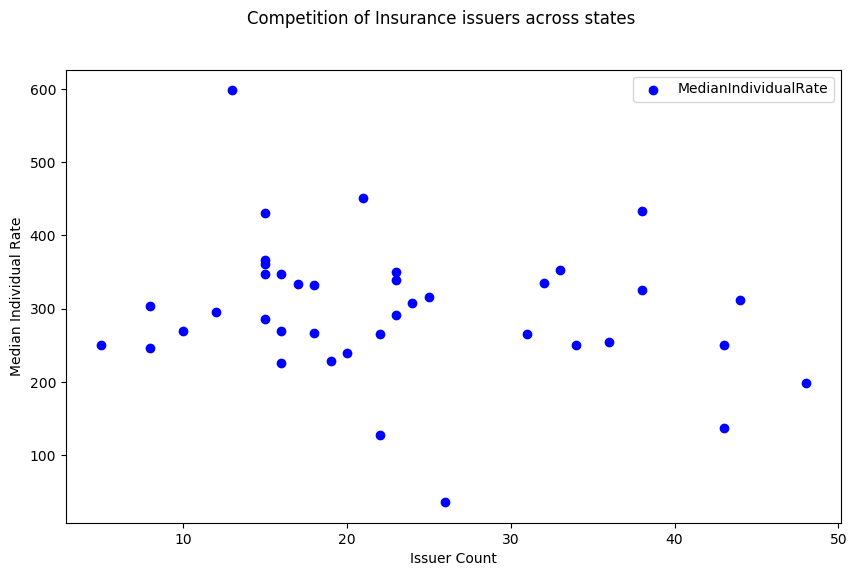

In [23]:
# Plot the relation between median and the number of insuarnce issuers in each state
fig= plt.figure(figsize=(10,6), dpi=100)
fig.suptitle('Competition of Insurance issuers across states')
scat = plt.scatter(Intermediate_scatmerge.CountIssuerId,Intermediate_scatmerge.MedianIndividualRate,marker='o', color='blue')
plt.legend(loc='upper right')
plt.ylabel('Median Individual Rate');
plt.xlabel('Issuer Count');
plt.show()

# B4. Variation in Costs over Time and with Age

In [24]:
# Filter the data frame to remove the 
modfiltered_report = mod_report[(mod_report.Age != 'Family Option')]

In [25]:
modfiltered_report.BusinessYear = modfiltered_report.BusinessYear.astype('object')
modfiltered_report.head()

C:\Users\mesme\Anaconda3\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,BusinessYear,StateCode,IssuerId,PlanId,Age,IndividualRate,IndividualTobaccoRate
0,2014,AK,21989,21989AK0010001,0-20,29.0,-1.0
3,2014,AK,21989,21989AK0010001,21,32.0,-1.0
4,2014,AK,21989,21989AK0010001,22,32.0,-1.0
7,2014,AK,21989,21989AK0010001,23,32.0,-1.0
8,2014,AK,21989,21989AK0010001,24,32.0,-1.0


In [26]:
#pivot the data to get the indivdual rates across each year
YearlyRate_report = modfiltered_report.pivot(index=None, columns='BusinessYear', values='IndividualRate')

C:\Users\mesme\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


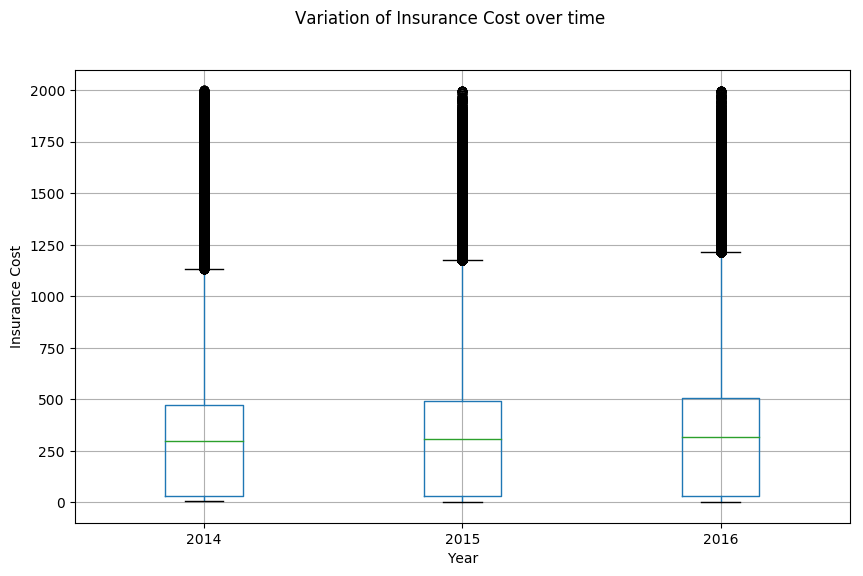

In [27]:
#Box plot the above data
fig= plt.figure(figsize=(10,6), dpi=100)
fig.suptitle('Variation of Insurance Cost over time')
ax = YearlyRate_report.boxplot( meanline=True , showcaps=True, showbox=True, showfliers=True,return_type='axes' )
plt.legend(loc='upper right')
plt.ylabel('Insurance Cost');
plt.xlabel('Year');
plt.show()

In [30]:
#Scrutinise the median value of the above graph
medianval = modfiltered_report.groupby(['BusinessYear'])['IndividualRate'].median()
medianval.head()

BusinessYear
2014    299.31
2015    307.51
2016    317.37
Name: IndividualRate, dtype: float64

C:\Users\mesme\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


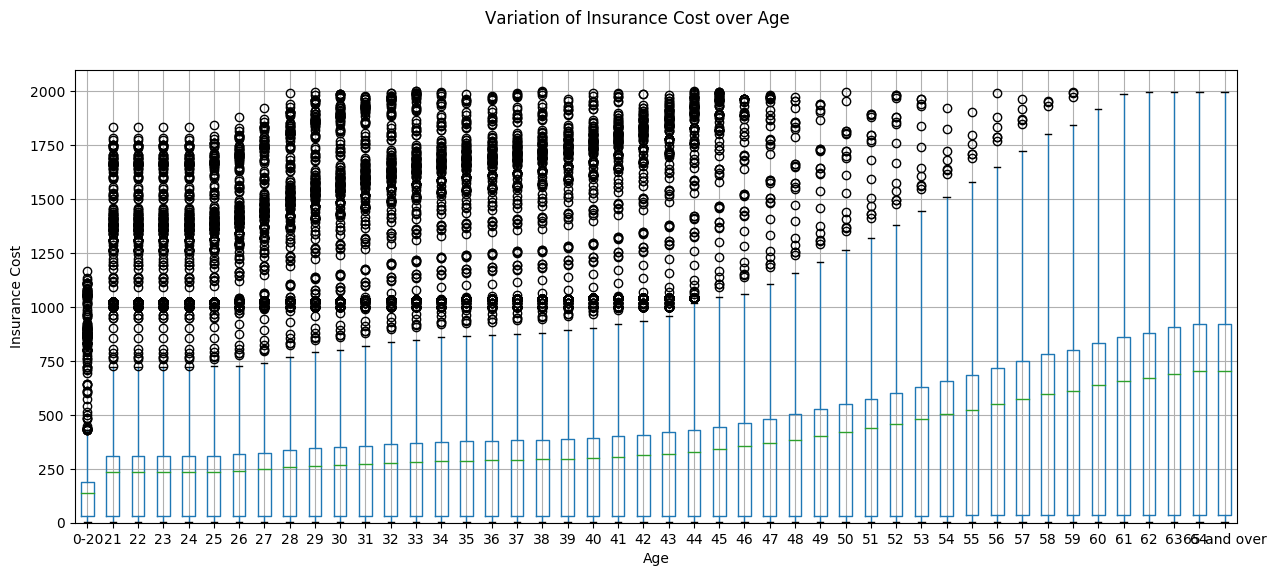

In [31]:
#pivot the data to get the indivdual rates across each age
AgedInsuranceReort = modfiltered_report.pivot(index=None, columns='Age', values='IndividualRate')

# plot the above data
fig= plt.figure(figsize=(15,6), dpi=100)
fig.suptitle('Variation of Insurance Cost over Age')
AgedInsuranceReort.boxplot( meanline=True, showcaps=True, showbox=True, showfliers=True, return_type='axes')
plt.legend(loc='upper right')
plt.ylabel('Insurance Cost');
plt.xlabel('Age');
plt.ylim(0,2100)
plt.show()

In [ ]:
# to calculate the difference of means between young and old
AgedInsuranceReort.describe()